In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/sgemm_product.csv")

In [3]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,115.26,115.87,118.55,115.80
1,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.13,78.25,79.25,79.19
2,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,79.84,80.69,80.76,80.97
3,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,84.32,89.90,86.75,85.58
4,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,115.13,121.98,122.73,114.81


In [4]:
df.isnull().sum()

MWG          0
NWG          1
KWG          1
MDIMC        1
NDIMC        1
MDIMA        1
NDIMB        1
KWI          1
VWM          1
VWN          1
STRM         1
STRN         1
SA           1
SB           1
Run1 (ms)    1
Run2 (ms)    1
Run3 (ms)    1
Run4 (ms)    1
dtype: int64

In [7]:
for col in df.columns:
  df[col].fillna(df[col].mode()[0],inplace = True)

In [8]:
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [12]:
df["mean-run"]=df["Run1 (ms)"]+df["Run2 (ms)"]+df["Run3 (ms)"]+df["Run4 (ms)"]

In [13]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),mean-run
0,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,115.26,115.87,118.55,115.80,465.48
1,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.13,78.25,79.25,79.19,314.82
2,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,79.84,80.69,80.76,80.97,322.26
3,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,84.32,89.90,86.75,85.58,346.55
4,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,115.13,121.98,122.73,114.81,474.65


In [14]:
df["mean-run"] = df["mean-run"]/4

In [18]:
df["mean-run"] = np.log10(df["mean-run"])

In [19]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),mean-run
0,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,115.26,115.87,118.55,115.80,2.065841
1,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.13,78.25,79.25,79.19,1.896002
2,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,79.84,80.69,80.76,80.97,1.906146
3,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,84.32,89.90,86.75,85.58,1.937706
4,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,115.13,121.98,122.73,114.81,2.074313


In [20]:
globalmean = df["mean-run"].mean()

In [21]:
globalmean

1.7480754221943244

In [22]:
df['labels'] = [1 if x >= globalmean  else 0 for x in df['mean-run']] 

In [23]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),mean-run,labels
0,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,115.26,115.87,118.55,115.80,2.065841,1
1,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.13,78.25,79.25,79.19,1.896002,1
2,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,79.84,80.69,80.76,80.97,1.906146,1
3,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,84.32,89.90,86.75,85.58,1.937706,1
4,16,16.0,16.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,115.13,121.98,122.73,114.81,2.074313,1


In [25]:
df.labels.value_counts()

0    41171
1    31819
Name: labels, dtype: int64

In [27]:
df2= df.groupby("labels")

In [29]:
df2

In [30]:
grouped = df.groupby(['labels'])

In [31]:
grouped_MWG = grouped["MWG"]

In [34]:
print(grouped_MWG)


In [35]:
for name, group in grouped:
   print(name)
   print(group)

0
       MWG    NWG   KWG  MDIMC  ...  Run3 (ms)  Run4 (ms)  mean-run  labels
50      16   16.0  16.0    8.0  ...      52.25      56.20  1.723435       0
51      16   16.0  16.0    8.0  ...      53.45      55.33  1.727907       0
54      16   16.0  16.0    8.0  ...      54.60      58.20  1.739731       0
55      16   16.0  16.0    8.0  ...      54.23      55.72  1.732695       0
58      16   16.0  16.0    8.0  ...      52.57      55.93  1.725850       0
...    ...    ...   ...    ...  ...        ...        ...       ...     ...
72985   64   32.0  16.0    8.0  ...      33.70      33.81  1.534343       0
72986   64   32.0  16.0    8.0  ...      27.72      27.64  1.442009       0
72987   64   32.0  16.0    8.0  ...      21.69      21.76  1.337659       0
72988   64   32.0  16.0    8.0  ...      43.75      43.60  1.641623       0
72989   64  128.0  32.0    8.0  ...      38.55      36.57  1.579097       0

[41171 rows x 20 columns]
1
       MWG   NWG   KWG  MDIMC  ...  Run3 (ms)  Run4 (ms) 

In [39]:
# df2 = df.loc[:, df.columns != ["Run4 (ms)","Run2 (ms)","Run1 (ms)","Run3 (ms)","mean-run"]]
df2= df[df.columns.difference(["Run4 (ms)","Run2 (ms)","Run1 (ms)","Run3 (ms)","mean-run"])]

In [40]:
df2

,KWG,KWI,MDIMA,MDIMC,MWG,NDIMB,NDIMC,NWG,SA,SB,STRM,STRN,VWM,VWN,labels
0,16.0,2.0,8.0,8.0,16,8.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,1.0,1
1,16.0,2.0,8.0,8.0,16,8.0,8.0,16.0,0.0,1.0,0.0,0.0,1.0,1.0,1
2,16.0,2.0,8.0,8.0,16,8.0,8.0,16.0,1.0,0.0,0.0,0.0,1.0,1.0,1
3,16.0,2.0,8.0,8.0,16,8.0,8.0,16.0,1.0,1.0,0.0,0.0,1.0,1.0,1
4,16.0,2.0,8.0,8.0,16,8.0,8.0,16.0,0.0,0.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72985,16.0,2.0,16.0,8.0,64,8.0,8.0,32.0,0.0,1.0,1.0,0.0,2.0,4.0,0
72986,16.0,2.0,16.0,8.0,64,8.0,8.0,32.0,1.0,0.0,1.0,0.0,2.0,4.0,0
72987,16.0,2.0,16.0,8.0,64,8.0,8.0,32.0,1.0,1.0,1.0,0.0,2.0,4.0,0
72988,16.0,2.0,16.0,8.0,64,8.0,8.0,32.0,0.0,0.0,1.0,1.0,2.0,4.0,0


In [42]:
df3 = df2.groupby('labels').agg(lambda x: x.tolist())

In [43]:
df3

,KWG,KWI,MDIMA,MDIMC,MWG,NDIMB,NDIMC,NWG,SA,SB,STRM,STRN,VWM,VWN
labels,,,,,,,,,,,,,,
0,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 8.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ..."
1,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [62]:
cols = df3.columns

In [65]:
cols=list(cols)

In [70]:
cols

['KWG',
 'KWI',
 'MDIMA',
 'MDIMC',
 'MWG',
 'NDIMB',
 'NDIMC',
 'NWG',
 'SA',
 'SB',
 'STRM',
 'STRN',
 'VWM',
 'VWN']

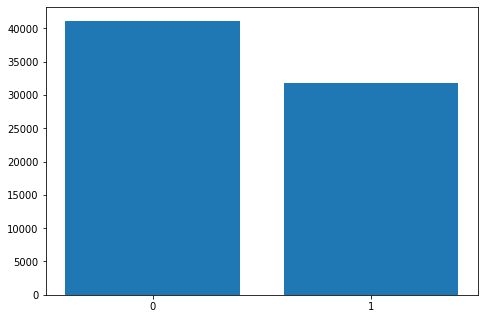

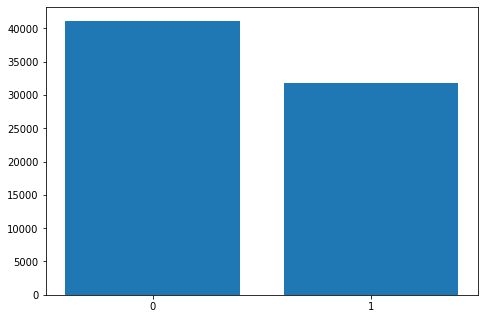

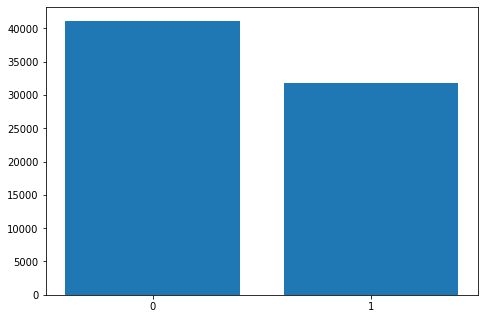

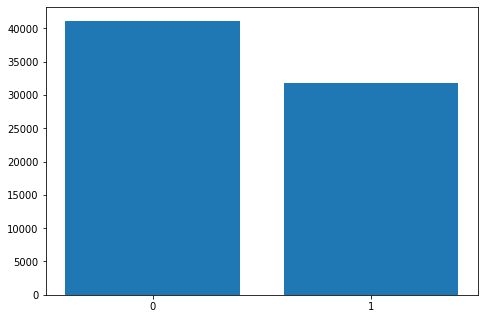

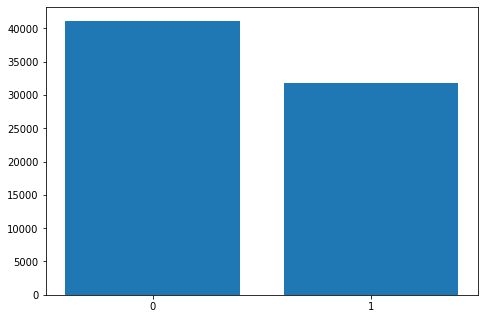

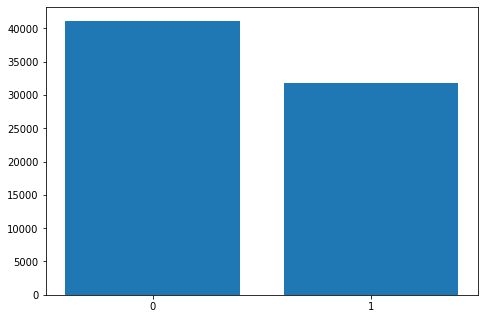

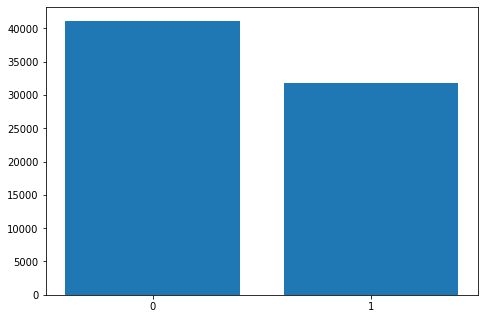

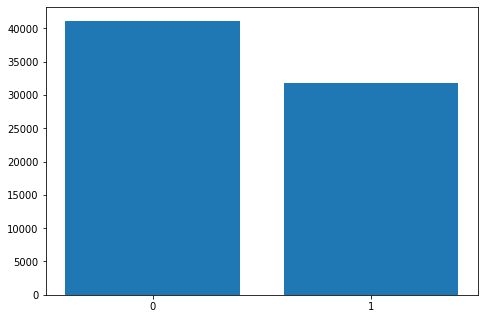

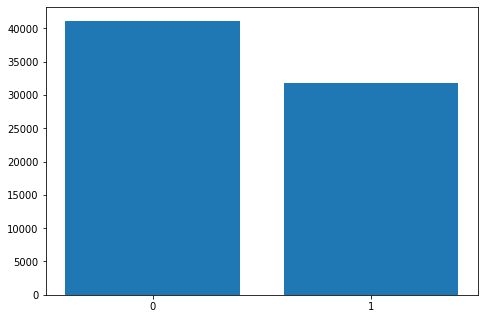

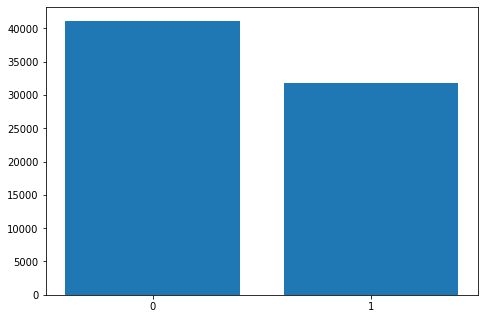

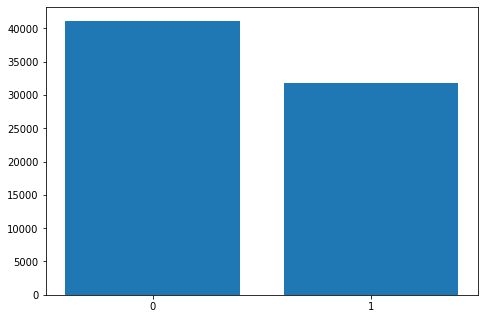

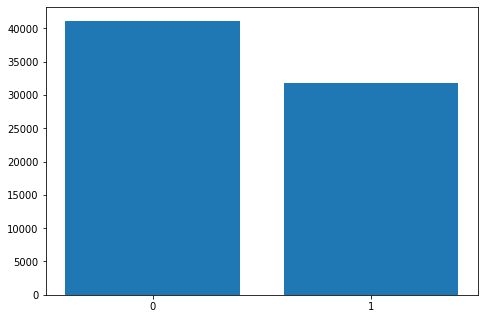

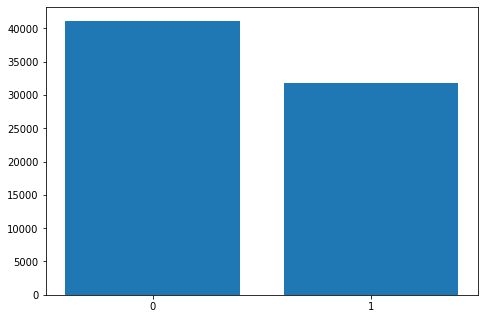

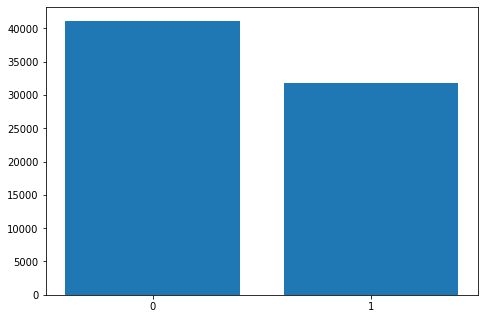

In [67]:
import numpy as np
import matplotlib.pyplot as plt

for column in cols:
  Y=df3[column][0]
  Y2=df3[column][1]
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  
  label = ['0','1']
  counter = [len(Y),len(Y2)]
  ax.bar(label,counter)
  plt.show()

In [69]:
# Y = df3.values

In [68]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# label = ['0','1']
# counter = [len(Y),len(Y2)]
# ax.bar(counter,label)
# plt.show()